In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np

In [55]:
column_titles = ["Seed", "Bot #", "", "Num of Steps"]
# 1, 2, 3, 4, 5, 6, 7 currently have data
deterministic = {1, 2, 5, 6}
probabalistic = {3, 4, 7, 8, 9}
dataframes = [None]
for i in range(1, 10):
    dataframes.append(None)
    path = "../data/bot_{}.csv".format(i)
    if not os.path.isfile(path):
        continue
    column_titles[2] = "K" if i in deterministic else "Alpha"
    df = pd.read_csv(path, names=column_titles)
    if i in probabalistic:
        df = df[df.Alpha != 0.000000]
        df["Alpha"] = ((df["Alpha"]*1e6).astype(int).astype(float))/1e6
    dataframes[i] = df

In [46]:
path = "../data/bot_{}(1).csv".format(4)
df = pd.read_csv(path, names=column_titles)
df = df[df.Alpha != 0.000000]
df["Alpha"] = ((df["Alpha"]*1e6).astype(int).astype(float))/1e6
dataframes.append(df)

In [6]:
dataframes[8]

,Seed,Bot #,Alpha,Num of Steps
1,148141254,bot_8,0.007142,688
2,148141254,bot_8,0.014285,272
3,148141254,bot_8,0.021428,534
4,148141254,bot_8,0.028571,188
5,148141254,bot_8,0.035714,182
...,...,...,...,...
1416,522082613,bot_8,0.071428,411
1417,522082613,bot_8,0.078571,401
1418,522082613,bot_8,0.085714,379
1419,522082613,bot_8,0.092857,109


##### Bot 1 vs Bot 2 as a function of _k_

In [7]:
# Bot 1
df1 = dataframes[1]
k_averages_1 = df1.groupby('K')['Num of Steps'].mean().reset_index()
k_averages_1

,K,Num of Steps
0,1,430.79
1,2,231.72
2,3,166.68
3,4,159.16
4,5,145.57
5,6,140.08
6,7,151.45
7,8,171.56


In [8]:
# Bot 2
df2 = dataframes[2]
k_averages_2 = df2.groupby('K')['Num of Steps'].mean().reset_index()
k_averages_2

,K,Num of Steps
0,1,378.01
1,2,193.28
2,3,150.21
3,4,147.11
4,5,136.80
5,6,135.09
6,7,146.07
7,8,172.03


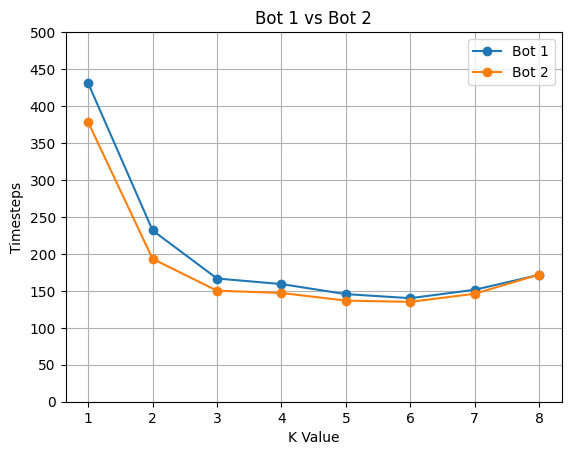

In [9]:
plt.plot(k_averages_1['K'], k_averages_1['Num of Steps'], marker='o', linestyle='-', label = "Bot 1")
plt.plot(k_averages_2['K'], k_averages_2['Num of Steps'], marker='o', linestyle='-', label = "Bot 2")
plt.xticks(np.arange(1, 9, 1))
plt.yticks(np.arange(0, 550, 50)) 
plt.xlabel('K Value')
plt.ylabel('Timesteps')
plt.title('Bot 1 vs Bot 2')
plt.grid(True)  # Display grid lines
plt.legend()
plt.savefig('../data/plots/bot1_vs_bot2.png')

##### Bot 3 vs Bot 4 as a function of _α_

In [56]:
# Bot 3
df3 = dataframes[3]
alpha_averages_3 = df3.groupby('Alpha')['Num of Steps'].mean().reset_index()
alpha_averages_3

,Alpha,Num of Steps
0,0.007142,477.33
1,0.014285,356.59
2,0.021428,280.41
3,0.028571,306.69
4,0.035714,298.93
5,0.042857,311.55
6,0.050000,333.09
7,0.057142,316.27
8,0.064285,298.87
9,0.071428,347.15


In [57]:
# Bot 4
df4 = dataframes[4]
alpha_averages_4 = df4.groupby('Alpha')['Num of Steps'].mean().reset_index()
alpha_averages_4

,Alpha,Num of Steps
0,0.007142,357.918367
1,0.014285,288.581633
2,0.021428,276.061224
3,0.028571,252.132653
4,0.035714,244.959184
5,0.042857,234.428571
6,0.050000,228.540816
7,0.057142,241.642857
8,0.064285,222.224490
9,0.071428,219.785714


In [53]:
# Bot Temp
dfTemp = dataframes[10]
alpha_averages_Temp = dfTemp.groupby('Alpha')['Num of Steps'].mean().reset_index()
alpha_averages_Temp

,Alpha,Num of Steps
0,0.007142,417.819820
1,0.014285,318.306306
2,0.021428,304.891892
3,0.028571,274.747748
4,0.035714,269.693694
5,0.042857,258.882883
6,0.050000,279.468468
7,0.057142,274.729730
8,0.064285,246.891892
9,0.071428,260.009009


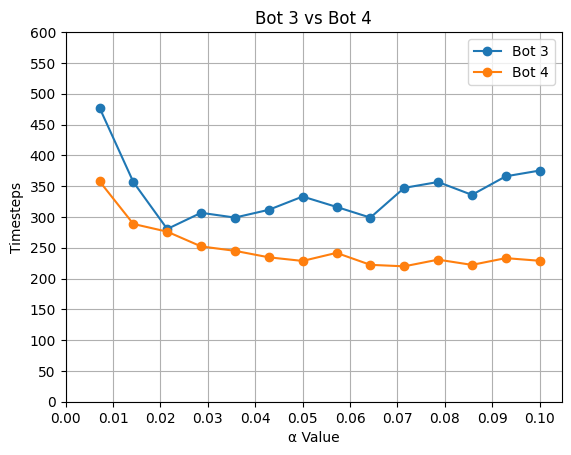

In [59]:
plt.plot(alpha_averages_3['Alpha'], alpha_averages_3['Num of Steps'], marker='o', linestyle='-', label = "Bot 3")
plt.plot(alpha_averages_4['Alpha'], alpha_averages_4['Num of Steps'], marker='o', linestyle='-', label = "Bot 4")
#plt.plot(alpha_averages_Temp['Alpha'], alpha_averages_Temp['Num of Steps'], marker='o', linestyle='-', label = "Bot 4(1)")
plt.xticks(list(np.arange(0, 0.11, 0.01)))
plt.yticks(np.arange(0, 650, 50)) 
plt.xlabel('α Value')
plt.ylabel('Timesteps')
plt.title('Bot 3 vs Bot 4')
plt.grid(True)  # Display grid lines
plt.legend()
plt.savefig('../data/plots/bot3_vs_bot4.png')

##### Bot 5 vs Bot 6 as a function of _k_

In [14]:
# Bot 5
df5 = dataframes[5]
k_averages_5 = df5.groupby('K')['Num of Steps'].mean().reset_index()
k_averages_5

,K,Num of Steps
0,1,608.24
1,2,367.65
2,3,260.31
3,4,243.68
4,5,259.66
5,6,273.91
6,7,303.01
7,8,343.32


In [15]:
# Bot 6
df6 = dataframes[6]
k_averages_6 = df6.groupby('K')['Num of Steps'].mean().reset_index()
k_averages_6

,K,Num of Steps
0,1,532.01
1,2,298.59
2,3,241.20
3,4,235.30
4,5,239.52
5,6,269.45
6,7,305.91
7,8,345.09


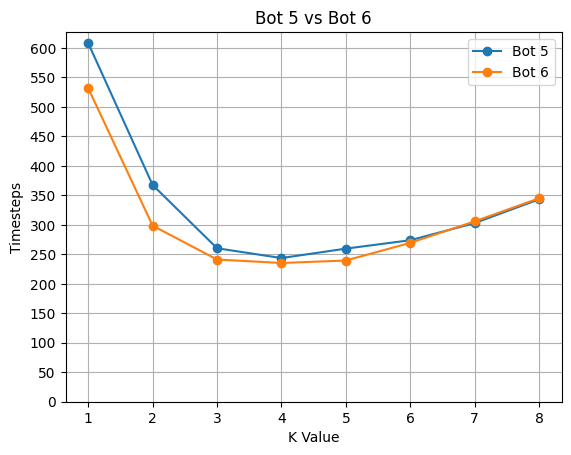

In [16]:
plt.plot(k_averages_5['K'], k_averages_5['Num of Steps'], marker='o', linestyle='-', label = "Bot 5")
plt.plot(k_averages_6['K'], k_averages_6['Num of Steps'], marker='o', linestyle='-', label = "Bot 6")
plt.xticks(np.arange(1, 9, 1))
plt.yticks(np.arange(0, 650, 50)) 
plt.xlabel('K Value')
plt.ylabel('Timesteps')
plt.title('Bot 5 vs Bot 6')
plt.grid(True)  # Display grid lines
plt.legend()
plt.savefig('../data/plots/bot5_vs_bot6.png')

##### Bot 7 vs Bot 8 vs Bot 9 as a function of _α_

In [17]:
# Bot 7
df7 = dataframes[7]
alpha_averages_7 = df7.groupby('Alpha')['Num of Steps'].mean().reset_index()
alpha_averages_7

,Alpha,Num of Steps
0,0.007142,776.41
1,0.014285,741.40
2,0.021428,691.66
3,0.028571,709.71
4,0.035714,642.04
5,0.042857,682.07
6,0.050000,656.23
7,0.057142,686.59
8,0.064285,668.33
9,0.071428,679.90


In [18]:
# Bot 8
df8 = dataframes[8]
alpha_averages_8 = df8.groupby('Alpha')['Num of Steps'].mean().reset_index()
alpha_averages_8

,Alpha,Num of Steps
0,0.007142,882.55
1,0.014285,644.18
2,0.021428,601.46
3,0.028571,522.38
4,0.035714,516.58
5,0.042857,524.93
6,0.050000,525.18
7,0.057142,534.21
8,0.064285,526.48
9,0.071428,524.86


In [19]:
# Bot 9
df9 = dataframes[9]
alpha_averages_9 = df9.groupby('Alpha')['Num of Steps'].mean().reset_index()
alpha_averages_9

AttributeError: 'NoneType' object has no attribute 'groupby'

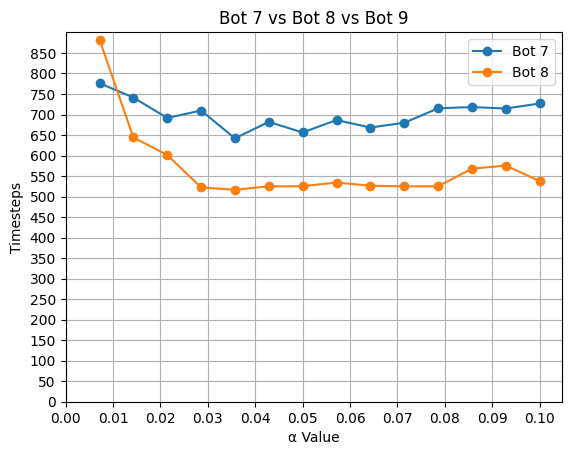

In [20]:
plt.plot(alpha_averages_7['Alpha'], alpha_averages_7['Num of Steps'], marker='o', linestyle='-', label = "Bot 7")
plt.plot(alpha_averages_8['Alpha'], alpha_averages_8['Num of Steps'], marker='o', linestyle='-', label = "Bot 8")
#plt.plot(alpha_averages_9['Alpha'], alpha_averages_9['Num of Steps'], marker='o', linestyle='-', label = "Bot 9")
plt.xticks(list(np.arange(0, 0.11, 0.01)))
plt.yticks(np.arange(0, 900, 50)) 
plt.xlabel('α Value')
plt.ylabel('Timesteps')
plt.title('Bot 7 vs Bot 8 vs Bot 9')
plt.grid(True)  # Display grid lines
plt.legend()
plt.savefig('../data/plots/bot7_vs_bot8_vs_bot9.png')